<a href="https://colab.research.google.com/github/saishh8/Online-Store-Customer-Churn-Prediction/blob/main/Customer_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CUSTOMER CHURN ANALYSIS**


---


**Customer churn** refers to the phenomenon where customers stop doing business with a company or cease using a service. It's a critical metric for businesses as it directly impacts revenue and growth. Understanding and managing customer churn involves tracking the rate at which customers leave and identifying the reasons behind their departure. This helps businesses implement strategies to retain existing customers and improve customer satisfaction.



---



This notebook uses [Online Retail Customer Churn Dataset](https://www.kaggle.com/datasets/hassaneskikri/online-retail-customer-churn-dataset/data) Dataset.

**Information About the Dataset:**

This dataset provides a comprehensive overview of customer interactions with an online retail store, aiming to predict customer churn based on various behavioral and demographic features. It includes data on customer demographics, spending behavior, satisfaction levels, and engagement with marketing campaigns. The dataset is designed for analysis and development of predictive models to identify customers at risk of churn, enabling targeted customer retention strategies.



---


**Description of Columns:**



*   Customer_ID: A unique identifier for each customer.

*   Age: The customer's age.

*   Gender: The customer's gender (Male, Female, Other).

*   Annual_Income: The annual income of the customer in thousands of dollars.

*   Total_Spend: The total amount spent by the customer in the last year.

*   Years_as_Customer: The number of years the individual has been a customer of the store.

*   Num_of_Purchases: The number of purchases the customer made in the last year.
*   Average_Transaction_Amount: The average amount spent per transaction.

*   Num_of_Returns: The number of items the customer returned in the last year.

*   Num_of_Support_Contacts: The number of times the customer contacted support in the last year.

*   Satisfaction_Score: A score from 1 to 5 indicating the customer's satisfaction with the store.

*   Last_Purchase_Days_Ago: The number of days since the customer's last purchase.

*   Email_Opt_In: Whether the customer has opted in to receive marketing emails.

*   Promotion_Response: The customer's response to the last promotional campaign (Responded, Ignored, Unsubscribed).

*   Target_Churn: Indicates whether the customer churned (True or False).





# **Imports**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

# **Loading Data**

In [3]:
df = pd.read_csv('/content/online_retail_customer_churn.csv')
df

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,1,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,2,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,3,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,4,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,5,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,997,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,998,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,999,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


# **Data Exploration**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 1000 non-null   int64  
 1   Age                         1000 non-null   int64  
 2   Gender                      1000 non-null   object 
 3   Annual_Income               1000 non-null   float64
 4   Total_Spend                 1000 non-null   float64
 5   Years_as_Customer           1000 non-null   int64  
 6   Num_of_Purchases            1000 non-null   int64  
 7   Average_Transaction_Amount  1000 non-null   float64
 8   Num_of_Returns              1000 non-null   int64  
 9   Num_of_Support_Contacts     1000 non-null   int64  
 10  Satisfaction_Score          1000 non-null   int64  
 11  Last_Purchase_Days_Ago      1000 non-null   int64  
 12  Email_Opt_In                1000 non-null   bool   
 13  Promotion_Response          1000 n

In [5]:
df.shape

(1000, 15)

In [6]:
df.isnull().sum()

Customer_ID                   0
Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64

In [7]:
duplicate = df[df.duplicated()]
duplicate

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn


In [8]:
df[df['Annual_Income']==0]

,Customer_ID,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn


In [9]:
def checkValZero(df,cols):
  for col in cols:
    zVal = (df[col]==0).sum()
    print(f'Number of Zero Values in {col} is {zVal}')



def checkValNeg(df,cols):
  for col in cols:
    zVal = (df[col]<0).sum()
    print(f'Number of Negative Values in {col} is {zVal}')



In [10]:
specified_columns = ['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount']
checkValZero(df,specified_columns)

Number of Zero Values in Age is 0
Number of Zero Values in Annual_Income is 0
Number of Zero Values in Total_Spend is 0
Number of Zero Values in Years_as_Customer is 0
Number of Zero Values in Num_of_Purchases is 0
Number of Zero Values in Average_Transaction_Amount is 0


In [11]:
specified_columns = ['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount']
checkValNeg(df,specified_columns)

Number of Negative Values in Age is 0
Number of Negative Values in Annual_Income is 0
Number of Negative Values in Total_Spend is 0
Number of Negative Values in Years_as_Customer is 0
Number of Negative Values in Num_of_Purchases is 0
Number of Negative Values in Average_Transaction_Amount is 0


In [12]:
specified_columns = ['Age', 'Annual_Income', 'Total_Spend', 'Years_as_Customer', 'Num_of_Purchases', 'Average_Transaction_Amount']
any_zero = df[specified_columns].eq(0).any(axis=1)
df[any_zero].count()


Customer_ID                   0
Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64

In [13]:
zero_vals = (df[specified_columns].eq(0).any(axis=1)).sum()
zero_vals

0

In [14]:
negative_vals = df[specified_columns].lt(0).any(axis=1)
df[negative_vals].count()

Customer_ID                   0
Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64

In [15]:
negative_vals = (df[specified_columns].lt(0).any(axis=1)).sum()
negative_vals

0

In [16]:
df.drop('Customer_ID',axis=1,inplace=True)
df

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


In [17]:
df.describe()

,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,43.267000,111.962960,5080.79265,9.727000,49.456000,266.876530,4.612000,1.934000,2.974000,182.890000
std,15.242311,52.844111,2862.12335,5.536346,28.543595,145.873445,2.896869,1.402716,1.391855,104.391319
min,18.000000,20.010000,108.94000,1.000000,1.000000,10.460000,0.000000,0.000000,1.000000,1.000000
25%,30.000000,67.800000,2678.67500,5.000000,25.000000,139.682500,2.000000,1.000000,2.000000,93.000000
50%,43.000000,114.140000,4986.19500,9.000000,49.000000,270.100000,5.000000,2.000000,3.000000,180.500000
75%,56.000000,158.452500,7606.47000,14.000000,74.000000,401.602500,7.000000,3.000000,4.000000,274.000000
max,69.000000,199.730000,9999.64000,19.000000,99.000000,499.570000,9.000000,4.000000,5.000000,364.000000


In [18]:
(df['Years_as_Customer']==19).sum()

51

In [19]:
(df['Target_Churn'] == False).sum()

474

In [20]:
(df['Target_Churn'] == True).sum()

526

In [21]:
df[df['Age']<18]

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn


In [22]:
df['Age'].max()

69

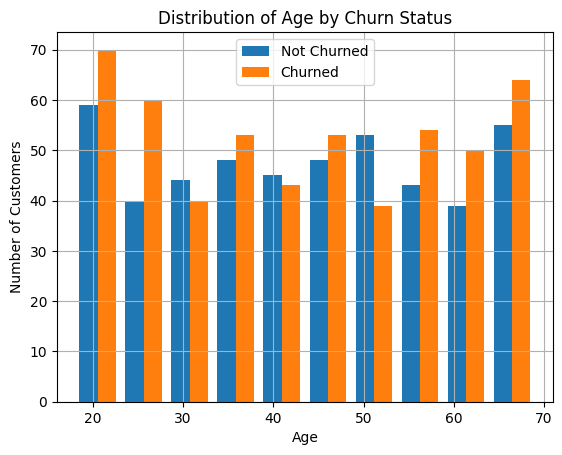

In [23]:

not_churned_data = df[df['Target_Churn'] == False]  # Filter for non-churned customers
churned_data = df[df['Target_Churn'] == True]  # Filter for churned customers
age_data_not_churned = not_churned_data['Age']  # Select age for non-churned
age_data_churned = churned_data['Age']  # Select age for churned


plt.hist([age_data_not_churned, age_data_churned], label=['Not Churned', 'Churned'])

# Customize the plot for readability
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Distribution of Age by Churn Status')
plt.grid(True)
plt.legend()
plt.show()

In [24]:
df

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


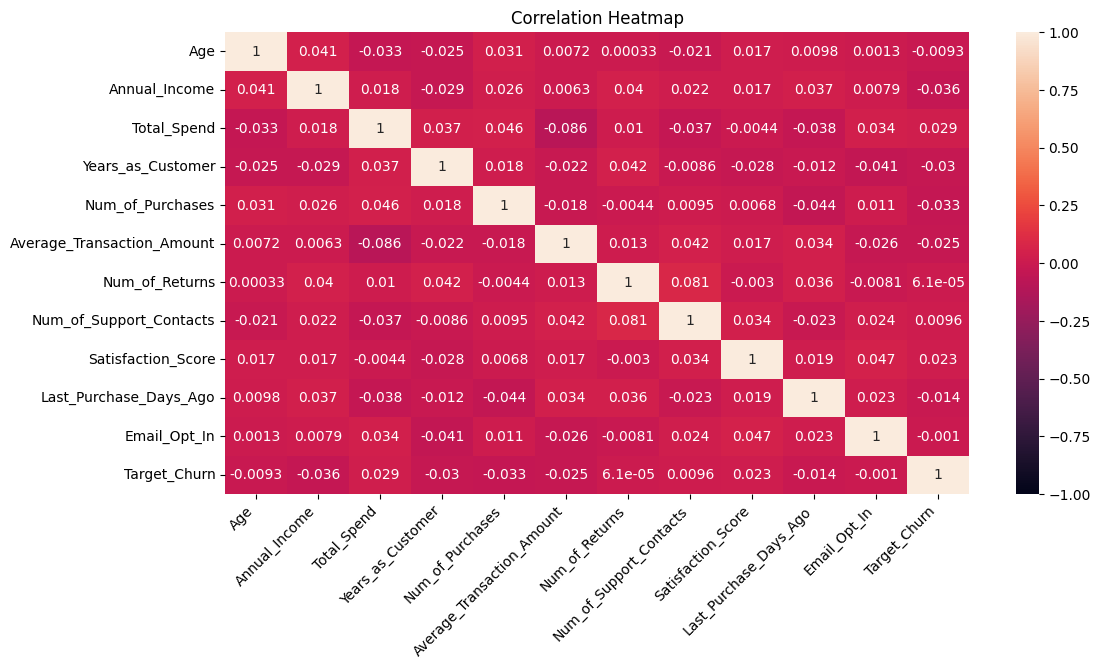

In [25]:
# Calculate correlation matrix
corr = df.corr(numeric_only=True)



# Create a heatmap with better formatting and color scheme
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)  # Adjust colormap if desired

# Add labels and title
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.title('Correlation Heatmap')
plt.show()

No strong Correlation

# **Age Categorization**

In [26]:
df.head(10)

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
5,57,Male,190.43,255.19,19,85,417.78,5,1,4,130,False,Unsubscribed,False
6,27,Male,172.13,3512.55,3,77,316.18,0,3,1,61,True,Unsubscribed,False
7,37,Other,88.90,7270.90,4,87,63.61,3,4,3,224,False,Ignored,False
8,39,Other,24.46,4935.49,1,21,173.80,9,2,4,126,True,Responded,True
9,68,Other,169.59,9803.57,17,34,481.18,6,1,2,171,True,Unsubscribed,False


In [27]:
bins = [18, 40, 60, 70]  # Inclusive lower bound, exclusive upper bound for all bins
labels = ['Adult', 'Middle Age', 'Senior']

df2=df.copy()
# Encode age into categories
df2['Age'] = pd.cut(df2['Age'], bins=bins, labels=labels, include_lowest=True)
df2

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,Senior,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,Senior,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,Adult,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,Adult,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,Adult,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Middle Age,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,Adult,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,Middle Age,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,Adult,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


In [28]:
df2.isna().sum()

Age                           0
Gender                        0
Annual_Income                 0
Total_Spend                   0
Years_as_Customer             0
Num_of_Purchases              0
Average_Transaction_Amount    0
Num_of_Returns                0
Num_of_Support_Contacts       0
Satisfaction_Score            0
Last_Purchase_Days_Ago        0
Email_Opt_In                  0
Promotion_Response            0
Target_Churn                  0
dtype: int64

# **Dealing With Outliers**

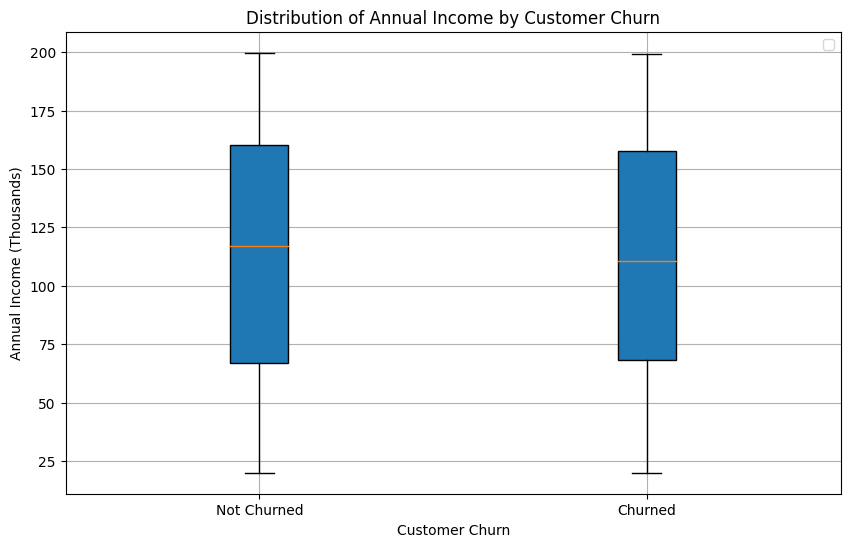

In [29]:
income_data = df2['Annual_Income']
churn_data = df2['Target_Churn']

# Create a boxplot with different colors for churned and non-churned customers
plt.figure(figsize=(10, 6))
plt.boxplot([income_data[churn_data == False], income_data[churn_data == True]], patch_artist=True, labels=['Not Churned', 'Churned'])

# Customize the plot for better readability
plt.xlabel('Customer Churn')
plt.ylabel('Annual Income (Thousands)')
plt.title('Distribution of Annual Income by Customer Churn')
plt.grid(True)
plt.legend()
plt.show()

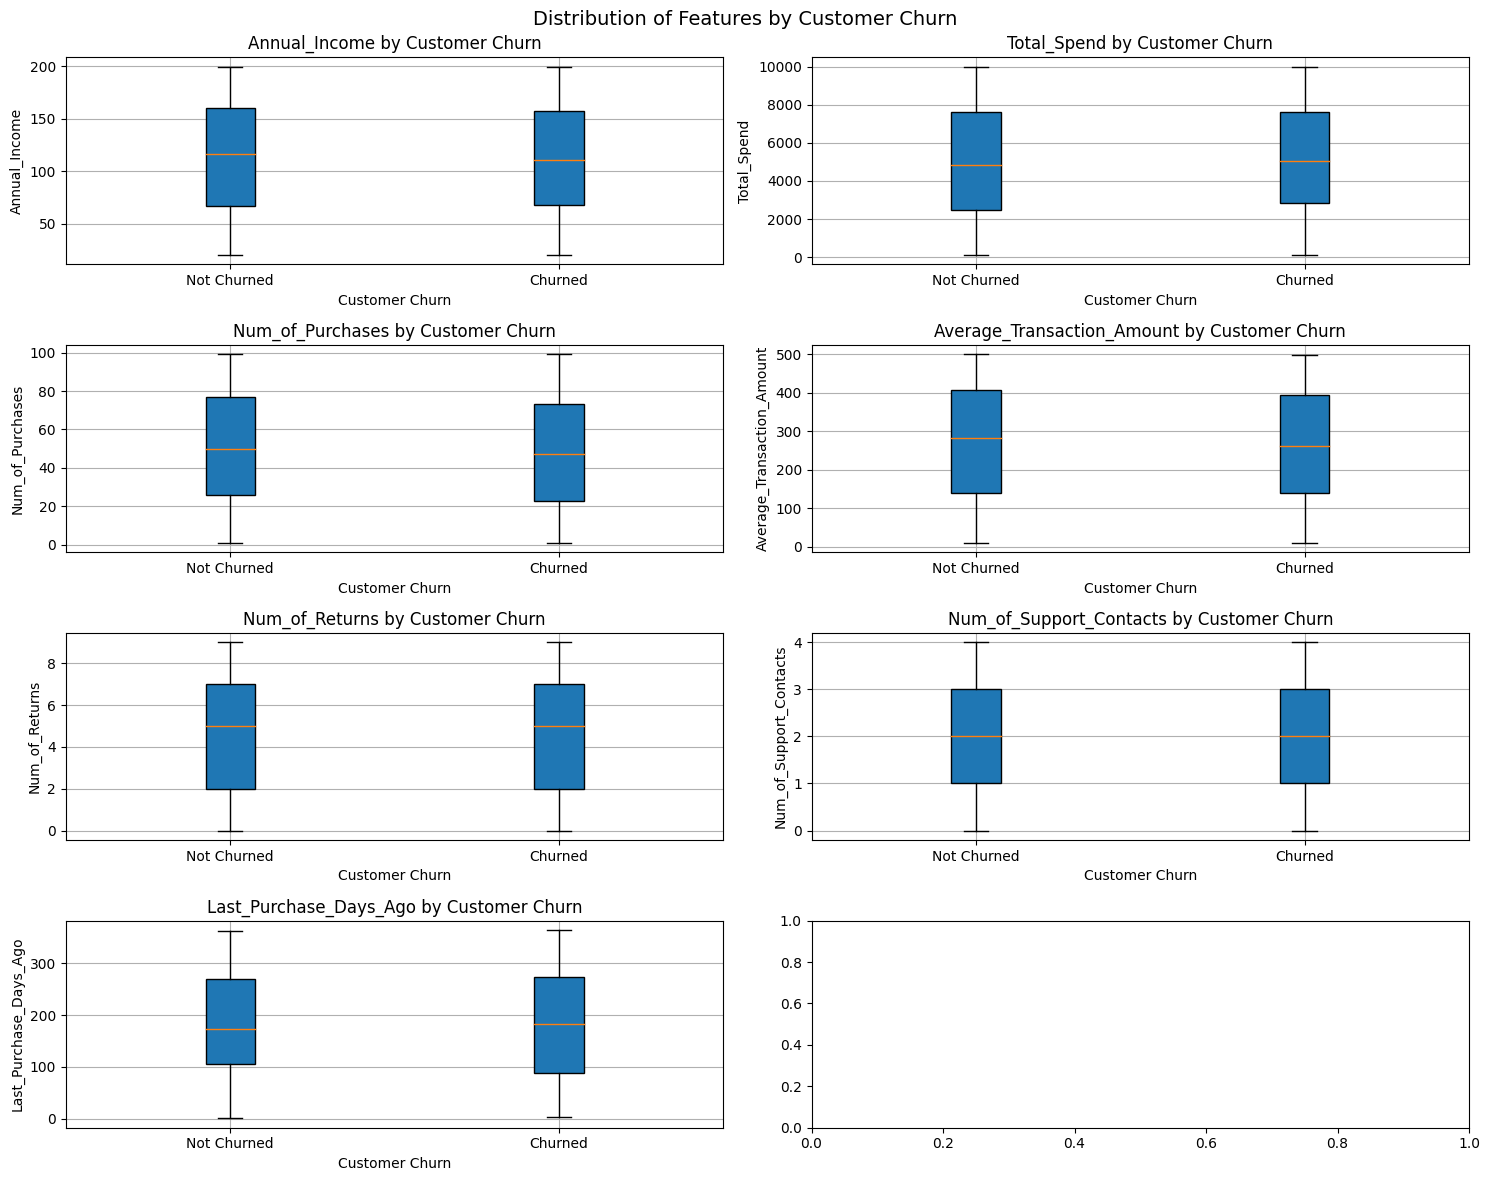

In [30]:
features = ['Annual_Income', 'Total_Spend', 'Num_of_Purchases', 'Average_Transaction_Amount',
            'Num_of_Returns', 'Num_of_Support_Contacts', 'Last_Purchase_Days_Ago']

# Create a subplot grid to arrange multiple boxplots
fig, axes = plt.subplots(4, 2, figsize=(15, 12))

# Loop through each feature and create a boxplot on the corresponding subplot
for i, feature in enumerate(features):
    income_data = df2[feature]
    churn_data = df2['Target_Churn']
    row, col = divmod(i, 2)  # Calculate row and column positions for the subplot

    # Create a boxplot with different colors for churned and non-churned customers
    axes[row, col].boxplot([income_data[churn_data == False], income_data[churn_data == True]], patch_artist=True, labels=['Not Churned', 'Churned'])
    axes[row, col].set_xlabel('Customer Churn')
    axes[row, col].set_ylabel(feature)
    axes[row, col].set_title(f'{feature} by Customer Churn')
    axes[row, col].grid(True)

# Adjust layout and titles for the subplots
fig.suptitle('Distribution of Features by Customer Churn', fontsize=14)
plt.tight_layout()
plt.show()

No Outliers were found.

# **Distribution of Feature**

In [31]:
df2

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,Senior,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,Senior,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,Adult,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,Adult,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,Adult,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Middle Age,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,Adult,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,Middle Age,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,Adult,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


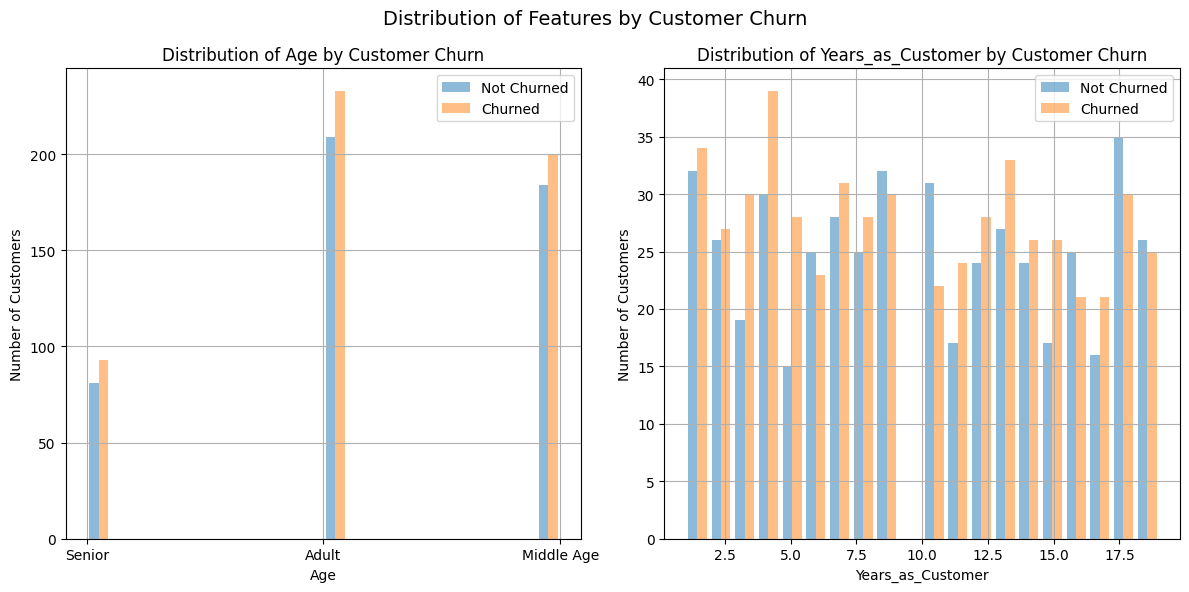

In [32]:

features = ['Age', 'Years_as_Customer']

# Create a subplot grid to arrange multiple histograms (adjusted for 2 plots)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Loop through each feature and create a histogram on the corresponding subplot
for i, feature in enumerate(features):
    customer_data = df2[feature]
    churn_data = df2['Target_Churn']

    # Create histograms for churned and non-churned customers with transparency
    axes[i].hist([customer_data[churn_data == False], customer_data[churn_data == True]], bins=20, alpha=0.5, label=['Not Churned', 'Churned'])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Number of Customers')
    axes[i].set_title(f'Distribution of {feature} by Customer Churn')
    axes[i].legend()
    axes[i].grid(True)

# Adjust layout and titles for the subplots
fig.suptitle('Distribution of Features by Customer Churn', fontsize=14)
plt.tight_layout()
plt.show()

# **Visualizations**

In [33]:
df

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,62,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,65,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,18,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,21,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,21,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,54,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,19,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,47,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,23,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


1.What is the Churn Rate?

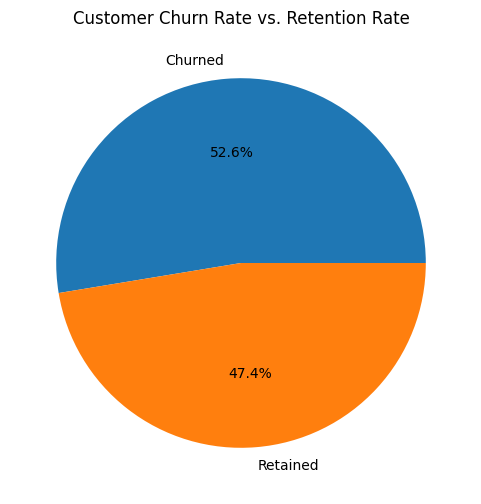

In [34]:
churn_count = len(df2[df2['Target_Churn'] == True])  # Count churned customers
total_count = len(df2)  # Count total customers

# Calculate churn rate and retention rate (assuming churn = True, not churn = False)
churn_rate = (churn_count / total_count) * 100
retention_rate = 100 - churn_rate

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie([churn_rate, retention_rate], labels=['Churned', 'Retained'], autopct="%1.1f%%")  # Adjust 'autopct' for label format
plt.title('Customer Churn Rate vs. Retention Rate')
plt.show()

Difference of 5.2% in Churn/Retain Rate. Data can be equalized later using SMOTE.

In [35]:
(df2["Target_Churn"]).value_counts()

Target_Churn
True     526
False    474
Name: count, dtype: int64

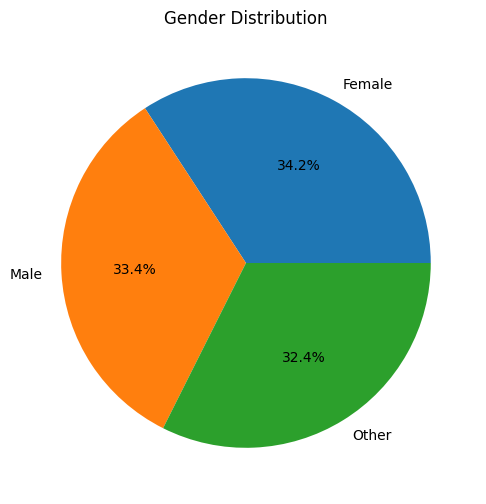

In [36]:
gender_counts = df2['Gender'].value_counts()  # Count occurrences of each gender

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%")  # Adjust 'autopct' for label format
plt.title('Gender Distribution')
plt.show()

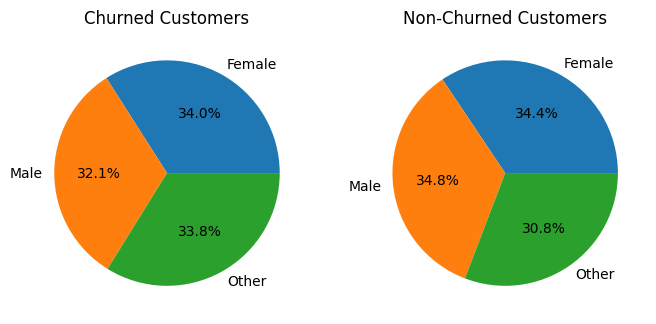

In [37]:
gender_churn_counts = df2.groupby(['Gender', 'Target_Churn'])['Target_Churn'].count().unstack(fill_value=0)
churned_gender_counts = gender_churn_counts[True]
not_churned_gender_counts = gender_churn_counts[False]



plt.figure(figsize=(8, 5))
plt.subplot(121)  # Create subplot 1 for churned
plt.pie(churned_gender_counts, labels=churned_gender_counts.index, autopct="%1.1f%%")
plt.title('Churned Customers')

plt.subplot(122)  # Create subplot 2 for non-churned
plt.pie(not_churned_gender_counts, labels=not_churned_gender_counts.index, autopct="%1.1f%%")
plt.title('Non-Churned Customers')

plt.show()  # Display both subplots

In [38]:
df["Target_Churn"][df2["Target_Churn"]==True].groupby(by=df2["Gender"]).count()

Gender
Female    179
Male      169
Other     178
Name: Target_Churn, dtype: int64

In [39]:
df["Target_Churn"][df2["Target_Churn"]==False].groupby(by=df2["Gender"]).count()

Gender
Female    163
Male      165
Other     146
Name: Target_Churn, dtype: int64

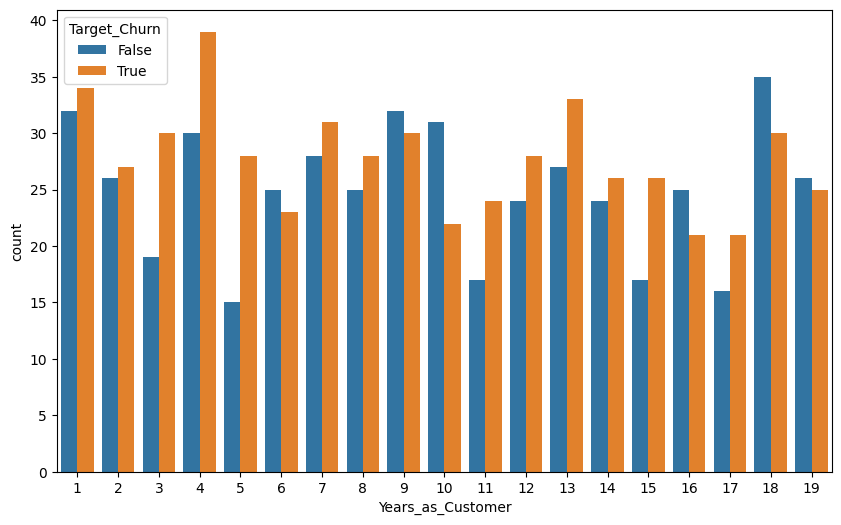

In [78]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Years_as_Customer', hue='Target_Churn', data=df2)
plt.show()


In [83]:
df2.groupby('Years_as_Customer')['Target_Churn'].value_counts()

Years_as_Customer  Target_Churn
1                  True            34
                   False           32
2                  True            27
                   False           26
3                  True            30
                   False           19
4                  True            39
                   False           30
5                  True            28
                   False           15
6                  False           25
                   True            23
7                  True            31
                   False           28
8                  True            28
                   False           25
9                  False           32
                   True            30
10                 False           31
                   True            22
11                 True            24
                   False           17
12                 True            28
                   False           24
13                 True            33
                  

People who've been customers for 1-19 years churn randomly. Not much can be deduced from this plot.

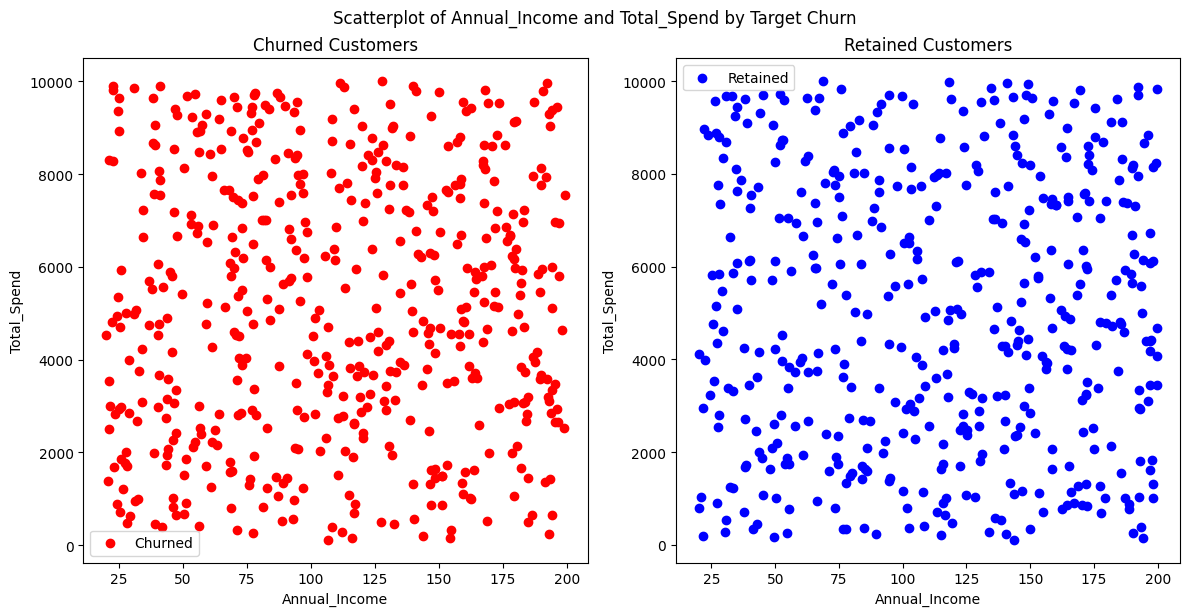

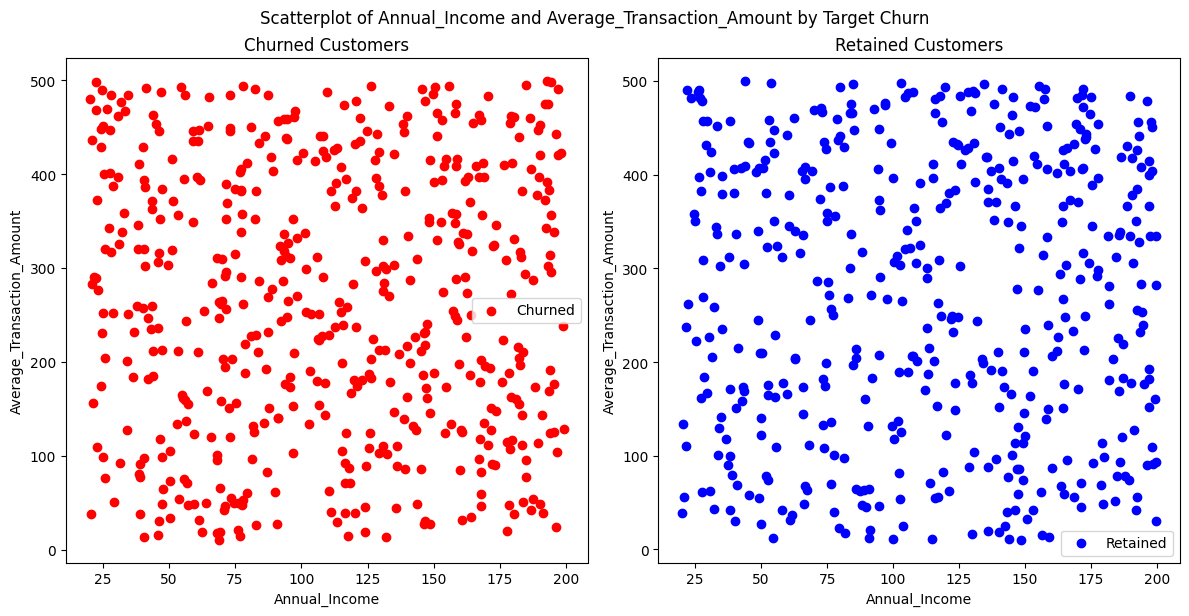

In [116]:
# List of features to create scatter plots for (replace with your desired features)
feature_pairs = [('Annual_Income', 'Total_Spend'), ('Annual_Income', 'Average_Transaction_Amount')]

# Loop through each feature pair
for feature1, feature2 in feature_pairs:
  # Create separate scatter plots for churned and non-churned customers
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Adjust figsize as needed

  # Filter data for churned customers
  churned_df = df2[df2['Target_Churn'] == True]
  # Create scatter plot for churned customers in the first subplot (red)
  ax1.scatter(churned_df[feature1], churned_df[feature2], color='red', label='Churned')
  ax1.set_title('Churned Customers')

  # Filter data for retained customers
  retained_df = df2[df2['Target_Churn'] == False]
  # Create scatter plot for retained customers in the second subplot (blue)
  ax2.scatter(retained_df[feature1], retained_df[feature2], color='blue', label='Retained')
  ax2.set_title('Retained Customers')

  # Add labels and legend (optional) for each subplot
  ax1.set_xlabel(feature1)
  ax1.set_ylabel(feature2)
  ax1.legend()

  ax2.set_xlabel(feature1)
  ax2.set_ylabel(feature2)
  ax2.legend()

  # Adjust layout (optional)
  plt.tight_layout()

  # Show the plot with a common suptitle
  plt.suptitle(f'Scatterplot of {feature1} and {feature2} by Target Churn', y=1.02)
  plt.show()

There is no strong correlation between any feature. The Only Interpretation that can be made here, more the annual income more they spend.

# **Data Transformation**

In [40]:
dfp = df2.copy()
dfp

,Age,Gender,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn
0,Senior,Other,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True
1,Senior,Male,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False
2,Adult,Male,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True
3,Adult,Other,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True
4,Adult,Other,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Middle Age,Male,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False
996,Adult,Male,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True
997,Middle Age,Female,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False
998,Adult,Male,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True


In [41]:

ohe = OneHotEncoder(sparse=False)  # Set sparse=False for easier viewing
df_encoded = pd.DataFrame(ohe.fit_transform(dfp[['Gender']]))

# Ensure the order: Male, Female, Other (adjust if categories differ)
df_encoded.columns = [ 'Female','Male','Other']

# Combine with the original DataFrame (optional)
dfp = pd.concat([dfp, df_encoded], axis=1).drop('Gender', axis=1)

dfp

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Promotion_Response,Target_Churn,Female,Male,Other
0,Senior,45.15,5892.58,5,22,453.80,2,0,3,129,True,Responded,True,0.0,0.0,1.0
1,Senior,79.51,9025.47,13,77,22.90,2,2,3,227,False,Responded,False,0.0,1.0,0.0
2,Adult,29.19,618.83,13,71,50.53,5,2,2,283,False,Responded,True,0.0,1.0,0.0
3,Adult,79.63,9110.30,3,33,411.83,5,3,5,226,True,Ignored,True,0.0,0.0,1.0
4,Adult,77.66,5390.88,15,43,101.19,3,0,5,242,False,Unsubscribed,False,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Middle Age,143.72,1089.09,2,29,77.75,0,3,2,88,True,Ignored,False,0.0,1.0,0.0
996,Adult,164.19,3700.24,9,90,34.45,6,4,4,352,False,Responded,True,0.0,1.0,0.0
997,Middle Age,113.31,705.85,17,69,187.37,7,3,1,172,True,Unsubscribed,False,1.0,0.0,0.0
998,Adult,72.98,3891.60,7,31,483.80,1,2,5,55,False,Responded,True,0.0,1.0,0.0


In [42]:

ohe = OneHotEncoder(sparse=False)  # Set sparse=False for easier viewing
df_encoded = pd.DataFrame(ohe.fit_transform(dfp[['Promotion_Response']]))

# Ensure the order: Male, Female, Other (adjust if categories differ)
df_encoded.columns = [ 'Responded','Ignored','Unsubscribed']

# Combine with the original DataFrame (optional)
dfp = pd.concat([dfp, df_encoded], axis=1).drop('Promotion_Response', axis=1)

dfp

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Target_Churn,Female,Male,Other,Responded,Ignored,Unsubscribed
0,Senior,45.15,5892.58,5,22,453.80,2,0,3,129,True,True,0.0,0.0,1.0,0.0,1.0,0.0
1,Senior,79.51,9025.47,13,77,22.90,2,2,3,227,False,False,0.0,1.0,0.0,0.0,1.0,0.0
2,Adult,29.19,618.83,13,71,50.53,5,2,2,283,False,True,0.0,1.0,0.0,0.0,1.0,0.0
3,Adult,79.63,9110.30,3,33,411.83,5,3,5,226,True,True,0.0,0.0,1.0,1.0,0.0,0.0
4,Adult,77.66,5390.88,15,43,101.19,3,0,5,242,False,False,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Middle Age,143.72,1089.09,2,29,77.75,0,3,2,88,True,False,0.0,1.0,0.0,1.0,0.0,0.0
996,Adult,164.19,3700.24,9,90,34.45,6,4,4,352,False,True,0.0,1.0,0.0,0.0,1.0,0.0
997,Middle Age,113.31,705.85,17,69,187.37,7,3,1,172,True,False,1.0,0.0,0.0,0.0,0.0,1.0
998,Adult,72.98,3891.60,7,31,483.80,1,2,5,55,False,True,0.0,1.0,0.0,0.0,1.0,0.0


In [43]:
age_categories = {'Adult': 0, 'Middle Age': 1, 'Senior': 2}  # Adjust categories as needed
dfp['Age'] = dfp['Age'].map(age_categories)

In [44]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Age                         1000 non-null   category
 1   Annual_Income               1000 non-null   float64 
 2   Total_Spend                 1000 non-null   float64 
 3   Years_as_Customer           1000 non-null   int64   
 4   Num_of_Purchases            1000 non-null   int64   
 5   Average_Transaction_Amount  1000 non-null   float64 
 6   Num_of_Returns              1000 non-null   int64   
 7   Num_of_Support_Contacts     1000 non-null   int64   
 8   Satisfaction_Score          1000 non-null   int64   
 9   Last_Purchase_Days_Ago      1000 non-null   int64   
 10  Email_Opt_In                1000 non-null   bool    
 11  Target_Churn                1000 non-null   bool    
 12  Female                      1000 non-null   float64 
 13  Male               

In [45]:
dfp

,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Target_Churn,Female,Male,Other,Responded,Ignored,Unsubscribed
0,2,45.15,5892.58,5,22,453.80,2,0,3,129,True,True,0.0,0.0,1.0,0.0,1.0,0.0
1,2,79.51,9025.47,13,77,22.90,2,2,3,227,False,False,0.0,1.0,0.0,0.0,1.0,0.0
2,0,29.19,618.83,13,71,50.53,5,2,2,283,False,True,0.0,1.0,0.0,0.0,1.0,0.0
3,0,79.63,9110.30,3,33,411.83,5,3,5,226,True,True,0.0,0.0,1.0,1.0,0.0,0.0
4,0,77.66,5390.88,15,43,101.19,3,0,5,242,False,False,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,143.72,1089.09,2,29,77.75,0,3,2,88,True,False,0.0,1.0,0.0,1.0,0.0,0.0
996,0,164.19,3700.24,9,90,34.45,6,4,4,352,False,True,0.0,1.0,0.0,0.0,1.0,0.0
997,1,113.31,705.85,17,69,187.37,7,3,1,172,True,False,1.0,0.0,0.0,0.0,0.0,1.0
998,0,72.98,3891.60,7,31,483.80,1,2,5,55,False,True,0.0,1.0,0.0,0.0,1.0,0.0


# **Data Preparation**

In [46]:
dfp

,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Target_Churn,Female,Male,Other,Responded,Ignored,Unsubscribed
0,2,45.15,5892.58,5,22,453.80,2,0,3,129,True,True,0.0,0.0,1.0,0.0,1.0,0.0
1,2,79.51,9025.47,13,77,22.90,2,2,3,227,False,False,0.0,1.0,0.0,0.0,1.0,0.0
2,0,29.19,618.83,13,71,50.53,5,2,2,283,False,True,0.0,1.0,0.0,0.0,1.0,0.0
3,0,79.63,9110.30,3,33,411.83,5,3,5,226,True,True,0.0,0.0,1.0,1.0,0.0,0.0
4,0,77.66,5390.88,15,43,101.19,3,0,5,242,False,False,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,143.72,1089.09,2,29,77.75,0,3,2,88,True,False,0.0,1.0,0.0,1.0,0.0,0.0
996,0,164.19,3700.24,9,90,34.45,6,4,4,352,False,True,0.0,1.0,0.0,0.0,1.0,0.0
997,1,113.31,705.85,17,69,187.37,7,3,1,172,True,False,1.0,0.0,0.0,0.0,0.0,1.0
998,0,72.98,3891.60,7,31,483.80,1,2,5,55,False,True,0.0,1.0,0.0,0.0,1.0,0.0


In [47]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Age                         1000 non-null   category
 1   Annual_Income               1000 non-null   float64 
 2   Total_Spend                 1000 non-null   float64 
 3   Years_as_Customer           1000 non-null   int64   
 4   Num_of_Purchases            1000 non-null   int64   
 5   Average_Transaction_Amount  1000 non-null   float64 
 6   Num_of_Returns              1000 non-null   int64   
 7   Num_of_Support_Contacts     1000 non-null   int64   
 8   Satisfaction_Score          1000 non-null   int64   
 9   Last_Purchase_Days_Ago      1000 non-null   int64   
 10  Email_Opt_In                1000 non-null   bool    
 11  Target_Churn                1000 non-null   bool    
 12  Female                      1000 non-null   float64 
 13  Male               

In [48]:
nums_cols = dfp.select_dtypes(include=np.number)
nums_cols

,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Female,Male,Other,Responded,Ignored,Unsubscribed
0,45.15,5892.58,5,22,453.80,2,0,3,129,0.0,0.0,1.0,0.0,1.0,0.0
1,79.51,9025.47,13,77,22.90,2,2,3,227,0.0,1.0,0.0,0.0,1.0,0.0
2,29.19,618.83,13,71,50.53,5,2,2,283,0.0,1.0,0.0,0.0,1.0,0.0
3,79.63,9110.30,3,33,411.83,5,3,5,226,0.0,0.0,1.0,1.0,0.0,0.0
4,77.66,5390.88,15,43,101.19,3,0,5,242,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,143.72,1089.09,2,29,77.75,0,3,2,88,0.0,1.0,0.0,1.0,0.0,0.0
996,164.19,3700.24,9,90,34.45,6,4,4,352,0.0,1.0,0.0,0.0,1.0,0.0
997,113.31,705.85,17,69,187.37,7,3,1,172,1.0,0.0,0.0,0.0,0.0,1.0
998,72.98,3891.60,7,31,483.80,1,2,5,55,0.0,1.0,0.0,0.0,1.0,0.0


In [49]:
nums_cols.drop(columns=['Female','Male','Other',],inplace=True)
nums_cols

,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Responded,Ignored,Unsubscribed
0,45.15,5892.58,5,22,453.80,2,0,3,129,0.0,1.0,0.0
1,79.51,9025.47,13,77,22.90,2,2,3,227,0.0,1.0,0.0
2,29.19,618.83,13,71,50.53,5,2,2,283,0.0,1.0,0.0
3,79.63,9110.30,3,33,411.83,5,3,5,226,1.0,0.0,0.0
4,77.66,5390.88,15,43,101.19,3,0,5,242,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,143.72,1089.09,2,29,77.75,0,3,2,88,1.0,0.0,0.0
996,164.19,3700.24,9,90,34.45,6,4,4,352,0.0,1.0,0.0
997,113.31,705.85,17,69,187.37,7,3,1,172,0.0,0.0,1.0
998,72.98,3891.60,7,31,483.80,1,2,5,55,0.0,1.0,0.0


In [50]:

X = dfp.drop('Target_Churn', axis=1)  # Features
y = dfp['Target_Churn']  # Target variable
# Split data into training and testing sets (default test_size is 0.25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size if needed #stratify=y

In [51]:
nums_cols = nums_cols.columns
# Assuming nums_cols already contains the column names for numerical features

scaler = MinMaxScaler()  # Create a MinMaxScaler object

# Fit the scaler on the training data (to learn min and max values)
scaler.fit(X_train[nums_cols])

# Transform the training and testing data using the fitted scaler
X_train[nums_cols] = scaler.transform(X_train[nums_cols])
X_test[nums_cols] = scaler.transform(X_test[nums_cols])

In [52]:
X_train

,Age,Annual_Income,Total_Spend,Years_as_Customer,Num_of_Purchases,Average_Transaction_Amount,Num_of_Returns,Num_of_Support_Contacts,Satisfaction_Score,Last_Purchase_Days_Ago,Email_Opt_In,Female,Male,Other,Responded,Ignored,Unsubscribed
29,2,0.701591,0.244546,0.333333,0.091837,0.211793,0.666667,1.00,0.00,0.080110,False,1.0,0.0,0.0,0.0,0.0,1.0
535,0,0.341086,0.496506,0.500000,0.122449,0.855636,0.222222,1.00,1.00,0.287293,True,0.0,0.0,1.0,1.0,0.0,0.0
695,1,0.722123,0.023249,0.055556,0.571429,0.277218,0.777778,0.25,0.00,0.466851,False,1.0,0.0,0.0,0.0,0.0,1.0
557,1,0.202203,0.846095,0.222222,0.061224,0.477295,0.111111,0.75,0.25,0.069061,False,0.0,0.0,1.0,0.0,0.0,1.0
836,0,0.029268,0.059669,0.944444,0.459184,0.493938,0.222222,0.25,0.00,0.950276,False,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,1,0.318495,0.749936,0.277778,0.295918,0.758970,0.888889,0.50,0.25,0.441989,False,1.0,0.0,0.0,1.0,0.0,0.0
270,0,0.059815,0.986341,1.000000,0.265306,0.789005,0.555556,0.75,0.00,0.071823,False,1.0,0.0,0.0,1.0,0.0,0.0
860,0,0.573281,0.317297,0.666667,0.397959,0.347918,0.777778,0.50,0.75,0.828729,False,0.0,1.0,0.0,0.0,1.0,0.0
435,0,0.928389,0.452176,0.111111,0.642857,0.223099,1.000000,0.50,1.00,0.132597,True,0.0,1.0,0.0,0.0,1.0,0.0


In [53]:
X_test.shape

(200, 17)

In [54]:
X_train.shape

(800, 17)

# **Model Building**

**Logistic Regression**

In [55]:
model_accuracies = {}

In [56]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

model_accuracies["Logistic Regression"] = accuracy_lr*100

Logistic Regression accuracy is : 0.46


In [57]:
lr_pred= lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)

              precision    recall  f1-score   support

       False       0.38      0.22      0.28        94
        True       0.49      0.67      0.57       106

    accuracy                           0.46       200
   macro avg       0.43      0.45      0.42       200
weighted avg       0.44      0.46      0.43       200



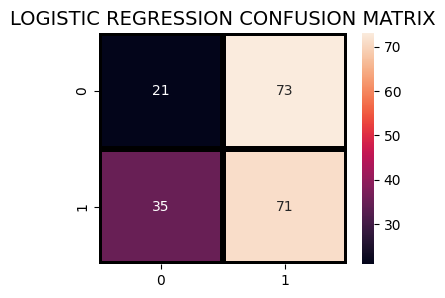

In [58]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

**Decision Tree**

In [59]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)
model_accuracies["Decision Tree"] = accuracy_dt*100

Decision Tree accuracy is : 0.535


In [60]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

       False       0.51      0.53      0.52        94
        True       0.56      0.54      0.55       106

    accuracy                           0.54       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.54      0.54      0.54       200



In [61]:
#Visualize the decision tree

from sklearn import tree
# plt.figure(figsize=(20,10))
# tree.plot_tree(dt_model, feature_names=X.columns, fontsize=10, filled=True)
# plt.show()


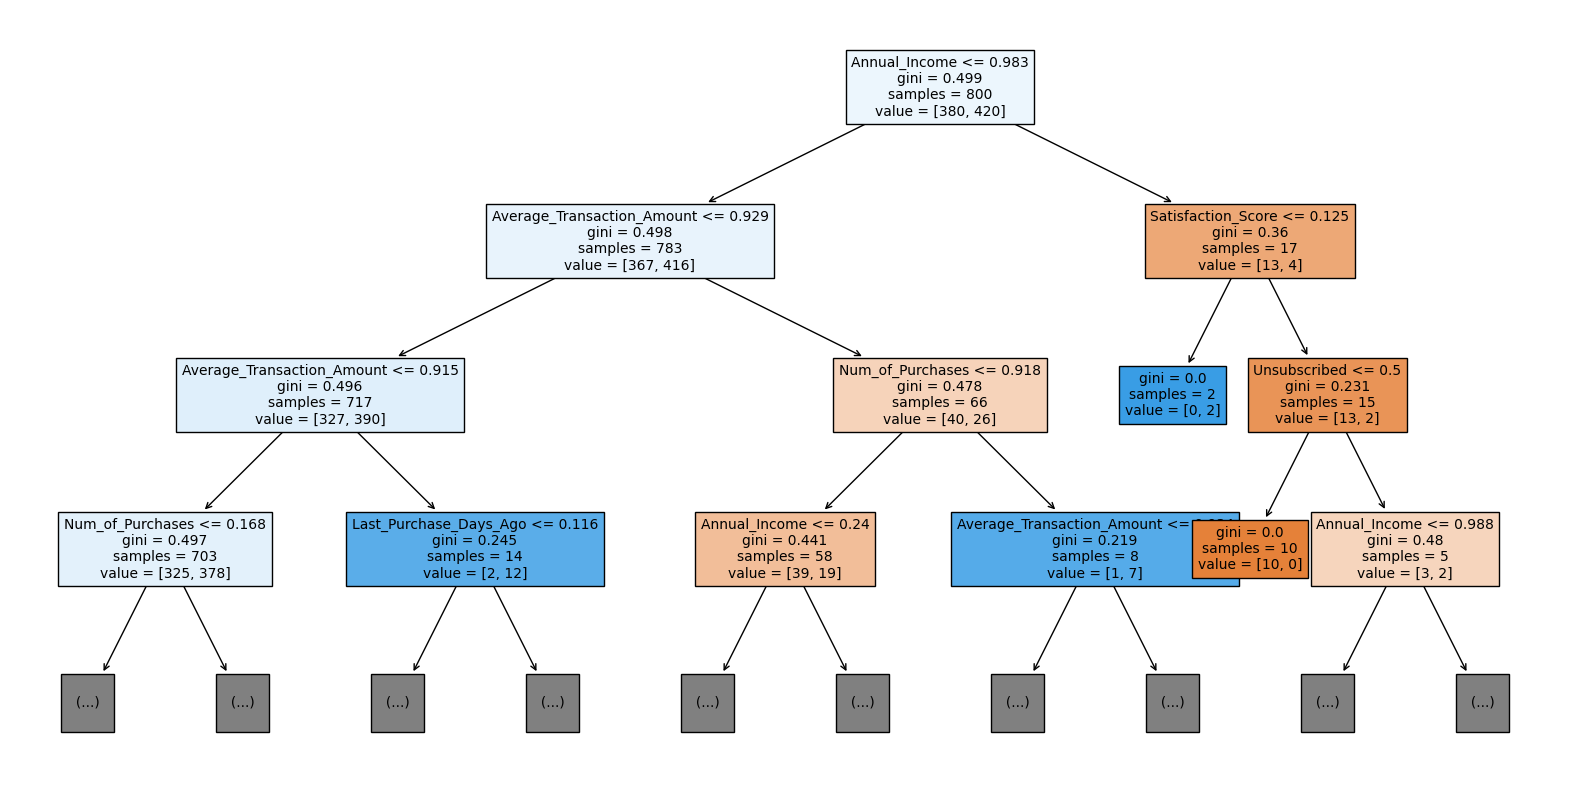

In [62]:
# Visvualize the decision tree upto 3 levels

plt.figure(figsize=(20,10))
tree.plot_tree(dt_model, feature_names=X.columns, fontsize=10, filled=True, max_depth=3)
plt.show()


**Adaboost**

In [63]:
a_model = AdaBoostClassifier()
a_model.fit(X_train,y_train)
a_preds = a_model.predict(X_test)
print("AdaBoost Classifier accuracy")
metrics.accuracy_score(y_test, a_preds)
model_accuracies["AdaBoost"] = metrics.accuracy_score(y_test, a_preds)*100

AdaBoost Classifier accuracy


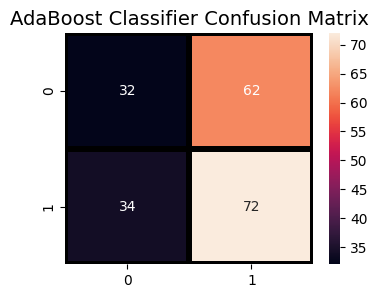

In [64]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, a_preds),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("AdaBoost Classifier Confusion Matrix",fontsize=14)
plt.show()

Gradient Boosting

In [65]:
gb = GradientBoostingClassifier(learning_rate=0.6) #0.5 w/o stratify else
gb.fit(X_train, y_train)
gb_pred = gb.predict(X_test)
print("Gradient Boosting Classifier", accuracy_score(y_test, gb_pred))
model_accuracies["Gradient Boosting"] = accuracy_score(y_test, gb_pred)*100

Gradient Boosting Classifier 0.575


**KNN**

In [66]:
knn = KNeighborsClassifier(n_neighbors=21) #21 if scaled 19 if not #15 if stratified
model_KNN = knn.fit(X_train, y_train)
KNN_model = knn.predict(X_test)
acc_KNN = accuracy_score(y_test, KNN_model)
acc_KNN
model_accuracies["KNN"] = acc_KNN*100

**Random Forest**

In [67]:
rf = RandomForestClassifier(n_estimators=100, random_state=42) #100 n-est
rf.fit(X_train,y_train)


# Prediction using the model

fcast_Y = rf.predict(X_test)
fcast_Y = pd.DataFrame(fcast_Y, columns= ['Predicted Values'])

# Accuracy, Confusion Matrix and Classification for Logistic Regression
accuracy = accuracy_score(y_test, fcast_Y)
print('Accuracy :', accuracy)
model_accuracies["Random Forest"] = accuracy*100


Accuracy : 0.605


In [68]:
cr = classification_report(y_test, fcast_Y)
print('Classification Report :\n', cr)

Classification Report :
               precision    recall  f1-score   support

       False       0.60      0.47      0.53        94
        True       0.61      0.73      0.66       106

    accuracy                           0.60       200
   macro avg       0.60      0.60      0.59       200
weighted avg       0.60      0.60      0.60       200



**Voting Classfier**

In [69]:
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2 = KNeighborsClassifier(n_neighbors=21)
clf3 = GradientBoostingClassifier(learning_rate=0.6)
eclf1 = VotingClassifier(estimators=[('rf', clf1), ('knn', clf2), ('gbc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score ")
print(accuracy_score(y_test, predictions))
model_accuracies["Voting Classifier"] = accuracy_score(y_test, predictions)*100

Final Accuracy Score 
0.59


In [70]:
model_df = pd.DataFrame.from_dict(model_accuracies, orient='index', columns=['Accuracy'])
model_df

,Accuracy
Logistic Regression,46.0
Decision Tree,53.5
AdaBoost,52.0
Gradient Boosting,57.5
KNN,54.5
Random Forest,60.5
Voting Classifier,59.0


# **Conclusions**

The data is uncorrelated and not much can be pinpointed regarding the customer behaviour. Although some observations have been made.


1.   Data has no null values nor repeated rows.

2.   Customers lie between age 18-69

3.   Ratio of Churned vs Retained Customers is 52.6% and 47.4% respectively. Data can be further equalized using SMOTE.

4.   Male/Female/Other churn ratio is unbiased. Ranging from 32.4-34.2%.

5.   Customer base churns irrespective of the years they've been visiting the store.

6.   Average Annual Income of Customer is 112k dollars.

7.   On an average the customer support is reached out only twice, indicating poor after-sale services.

8.   Customers satisfaction rate with store is average, with a room for improvement.
    


